##  Teleportation example showcasing IF_M blocks
This notebook uses Qubiter to illustrate quantum Teleportation 
of the pure state of one qubit (at 0) to another qubit (at 2) with the help of an ancilla qubit (at 1).

The purpose of this notebook is not to teach about the "theory" behind quantum Teleportation.
For that, the reader can go to numerous sources on the internet (Wikipedia, course notes, etc.)
The purpose is to showcase some of the features of Qubiter, especially IF_M blocks (and also PRINT statements and calculations and plotting of various density matrices associated with any quantum circuit).

For a full inventory of Qubiter English file commands, see <a href="../qubiter_rosetta_stone.pdf">
Qubiter's Rosetta Stone pdf</a>

IBM has posted at https://github.com/QISKit/qiskit-tutorial, a jupyter notebook similar to this one, analysing the same quantum circuit for quantum Teleportation from one qubit to another. Their notebook uses IBM's qasm language instead of Qubiter's language so you might profit from comparing their notebook to this one to decide which qc language you prefer. Qubiter includes subroutines that can translate its language to IBM qasm that can then be run on IBM qc hardware.


First change your working directory to the qubiter directory in your computer, and add its path to the path environment variable.

In [1]:
import os
import sys
print(os.getcwd())
os.chdir('../../')
print(os.getcwd())
sys.path.insert(0,os.getcwd())

C:\Users\rrtuc\Desktop\backedup\python-projects\qubiter\qubiter\jupyter_notebooks
C:\Users\rrtuc\Desktop\backedup\python-projects\qubiter


Next do imports:

In [2]:
from qubiter.SEO_writer import *
from qubiter.SEO_simulator import *
from qubiter.StateVec import *
from qubiter.Plotter import *
import numpy as np
# np.set_printoptions(precision=5)
import pandas as pan
import seaborn as sea; sea.set()

loaded OneBitGates, WITHOUT autograd.numpy


Number of qubits is 3.
Note that we use "bit" for both qbits and cbits.
Use a trivial circuit embedder that embeds 3 qubits into same 3 qubits

In [3]:
num_bits = 3
emb = CktEmbedder(num_bits, num_bits)

Open a writer, and tell it where to write to.
We will use zero bit last (ZL) convention which is the default.

In [4]:
file_prefix = 'teleportation-with-ifs'
wr = SEO_writer(file_prefix, emb)

Write English and Picture files of the quantum circuit. Close those files once finished writing to them.

In [5]:
wr.write_Rn(0, list(np.pi/180*np.array([20, 68, 46])))
wr.write_PRINT("ALL")

wr.write_H(1)
wr.write_cnot(control_bit=1, target_bit=2)
#wr.write_one_bit_gate(0, OneBitGates.rot_ax, [-np.pi/8, 2])
wr.write_cnot(control_bit=0, target_bit=1)
wr.write_H(0)
wr.write_PRINT("ALL")

wr.write_MEAS(0, kind=2)
wr.write_MEAS(1, kind=2)

wr.write_PRINT("ALL")
wr.write_IF_M_beg(Controls.new_knob(num_bits, 0, True))
wr.write_Z(2)
wr.write_IF_M_end()
wr.write_PRINT("ALL")
wr.write_IF_M_beg(Controls.new_knob(num_bits, 1, True))
wr.write_X(2)
wr.write_IF_M_end()
wr.write_PRINT("ALL")
    
wr.close_files()

The English and Picture files just produced have been stored in the io_folder. Here are links to them:
* <a href="../io_folder/teleportation-with-ifs_3_eng.txt">../io_folder/teleportation-with-ifs_3_eng.txt</a>
* <a href="../io_folder/teleportation-with-ifs_3_ZLpic.txt">../io_folder/teleportation-with-ifs_3_ZLpic.txt</a>

Let's print the English file:

In [6]:
wr.print_eng_file()

ROTN	20.0	68.0	46.0	AT	0
PRINT	ALL
HAD2	AT	1
SIGX	AT	2	IF	1T
SIGX	AT	1	IF	0T
HAD2	AT	0
PRINT	ALL
MEAS	2	AT	0
MEAS	2	AT	1
PRINT	ALL
IF_M(	0T	){
SIGZ	AT	2
}IF_M
PRINT	ALL
IF_M(	1T	){
SIGX	AT	2
}IF_M
PRINT	ALL



Let's print the Picture file. 

Time points downward, and, since we are using the ZL convention, the 0th qubit is rightmost. 

Note that after an M measurement, vertical lines "|"
directly under M are replaced by colons ":"

Line n of English file corresponds to line n of Picture file.

In [7]:
wr.print_pic_file()

|   |   R   
PRINT	ALL
|   H   |   
X---@   |   
|   X---@   
|   |   H   
PRINT	ALL
|   |   M   
|   M   :   
PRINT	ALL
IF_M(	0T	){
Z   :   :   
}IF_M
PRINT	ALL
IF_M(	1T	){
X   :   :   
}IF_M
PRINT	ALL



Now we create a simulator object with the ground state (|0> for each qubit) as initial state.
Creating the simulator automatically evolves the state from initial to final.

The PRINT statements that we have inserted in the quantum circuit print to
screen the state of the circuit at the line where they appear in the English and Picture files.
Each PRINT is identified by its line number (line numbers start with 1, what is called 1 based numbers) in the Eng and Pic files.

In [8]:
init_st_vec = StateVec.get_ground_st_vec(num_bits)
sim = SEO_simulator(file_prefix, num_bits, init_st_vec)


*************************beginning PRINT output
PRINT line number=2
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL (0.09587145233013179+0.5418806258342269j) , prob= 0.3028259480263821
(001)ZL (-0.8010409251462487+0.23560027210183782j) , prob= 0.697174051973618
total probability of state vector (=one if no measurements)= 1.0000000000000002
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.30282594802638213, 0.6971740519736178),
 1: (1.0000000000000002, -2.220446049250313e-16),
 2: (1.0000000000000002, -2.220446049250313e-16)}
****************************ending PRINT output

*************************beginning PRINT output
PRINT line number=7
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(000)ZL (0.04793572616506589+0.2709403129171134j) , prob= 0.07570648700659549
(100)ZL (-0.4005204625731243+0.11780013605091888j) , prob= 0.17429351299340448
(010)ZL (-0.4005204625731243+0.11780013605091888j) , prob= 0.1

Initially, all qubits are in state |0>. Line 1 of the circuit rotates qubit 0 by an arbitrary one qubit rotation.
Line 2 has a PRINT statement. If you look at the code for SEO_simulator.use_PRINT(),
you will see that a PRINT statement in format "ALL" prints stuff to screen and also stores 
at sim.cached_sts[line_num] a copy of the current state.

Next we convert the cached state at line_num=2 to
a density matrix called den_mat1. Then we convert den_mat1 to a Pandas dataframe
and display that dataframe as an HTML table. States are labeled in binary ZL (Zero bit last) convention.

In [9]:
# density  matrix cached at line number 2 of eng & pic files
den_mat1 = StateVec.get_den_mat(num_bits, sim.cached_sts[2])
den_mat1_df = Plotter.get_den_mat_df(num_bits, den_mat1)
# pan.set_option('precision', 5)
# print("\nden_mat1=\n", den_mat1_df)
den_mat1_df.style.format("{:.4}")

,000ZL,001ZL,010ZL,011ZL,100ZL,101ZL,110ZL,111ZL
000ZL,(0.3028+0j),(0.05087-0.4567j),0j,0j,0j,0j,0j,0j
001ZL,(0.05087+0.4567j),(0.6972+0j),0j,0j,0j,0j,0j,0j
010ZL,0j,0j,0j,0j,0j,0j,0j,0j
011ZL,0j,0j,0j,0j,0j,0j,0j,0j
100ZL,0j,0j,0j,0j,0j,0j,0j,0j
101ZL,0j,0j,0j,0j,0j,0j,0j,0j
110ZL,0j,0j,0j,0j,0j,0j,0j,0j
111ZL,0j,0j,0j,0j,0j,0j,0j,0j


Next we convert the final state (which is the current state of the simulator)
to a density matrix called den_mat2. Then we convert that to a Pandas dataframe
and display that dataframe as an HTML table.

In [10]:
den_mat2 = StateVec.get_den_mat(num_bits, sim.cur_st_vec_dict)
den_mat2_df = Plotter.get_den_mat_df(num_bits, den_mat2)
# print("\nden_mat2=\n", den_mat2_df)
den_mat2_df.style.format("{:.3}")

,000ZL,001ZL,010ZL,011ZL,100ZL,101ZL,110ZL,111ZL
000ZL,(0.0757+0j),0j,0j,0j,(0.0127-0.114j),0j,0j,0j
001ZL,0j,(0.0757+0j),0j,0j,0j,(0.0127-0.114j),0j,0j
010ZL,0j,0j,(0.0757+0j),0j,0j,0j,(0.0127-0.114j),0j
011ZL,0j,0j,0j,(0.0757+0j),0j,0j,0j,(0.0127-0.114j)
100ZL,(0.0127+0.114j),0j,0j,0j,(0.174+0j),0j,0j,0j
101ZL,0j,(0.0127+0.114j),0j,0j,0j,(0.174+0j),0j,0j
110ZL,0j,0j,(0.0127+0.114j),0j,0j,0j,(0.174+0j),0j
111ZL,0j,0j,0j,(0.0127+0.114j),0j,0j,0j,(0.174+0j)


Next we plot the entries of the square matrix den_mat2 as phasor arrows in a square grid (what is called a quiver plot). 

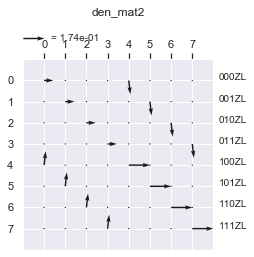

In [11]:
Plotter.plot_phasors(['den_mat2'], den_mat_df_list=[den_mat2_df])

Next we create a dataframe df by replacing each entry of den_mat2's dataframe by
its magnitude. Then we display df as an HTML table.

In [12]:
df = den_mat2_df.apply(lambda x : np.sqrt(np.real(x*np.conj(x))))
df

,000ZL,001ZL,010ZL,011ZL,100ZL,101ZL,110ZL,111ZL
000ZL,0.075706,0.000000,0.000000,0.000000,0.114870,0.000000,0.000000,0.000000
001ZL,0.000000,0.075706,0.000000,0.000000,0.000000,0.114870,0.000000,0.000000
010ZL,0.000000,0.000000,0.075706,0.000000,0.000000,0.000000,0.114870,0.000000
011ZL,0.000000,0.000000,0.000000,0.075706,0.000000,0.000000,0.000000,0.114870
100ZL,0.114870,0.000000,0.000000,0.000000,0.174294,0.000000,0.000000,0.000000
101ZL,0.000000,0.114870,0.000000,0.000000,0.000000,0.174294,0.000000,0.000000
110ZL,0.000000,0.000000,0.114870,0.000000,0.000000,0.000000,0.174294,0.000000
111ZL,0.000000,0.000000,0.000000,0.114870,0.000000,0.000000,0.000000,0.174294


df is a square dataframe of non-negative numbers so it begs to be plotted as a so called heatmap, using the wonderful package called seaborn.

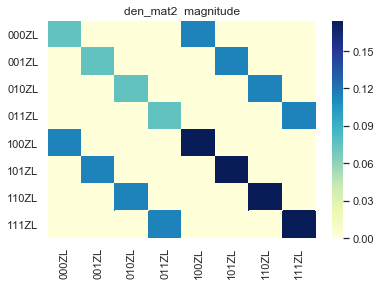

In [13]:
plt.close('all')
ax = sea.heatmap(df, cmap="YlGnBu")
ax.set_title('den_mat2  magnitude')
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()

The impurity of a density matrix $\rho$ is defined as $abs({\rm tr}(\rho^2) - 1 )$. It equals zero iff $\rho$
is a pure state. Note that den_mat2 is not a pure state.

In [14]:
print("impurity of den_mat2=", StateVec.get_impurity(den_mat2))

impurity of den_mat2= 0.75


Next we calculate the trace over bits 0 and 1 of den_mat2. We call this partial
density matrix tr01_den_mat2. We convert it to a dataframe, and display that dataframe as an HTML table.
Note that the state at qubit 0 in den_mat1 has been successfully duplicated at qubit 2 
with density matrix tr01_den_mat2.

In [15]:
tr01_den_mat2 = StateVec.get_partial_tr(num_bits, den_mat2, {0, 1})
tr01_den_mat2_df = Plotter.get_den_mat_df(1, tr01_den_mat2)
# print("\ntr01_den_mat2=\n", tr01_den_mat2_df)
tr01_den_mat2_df.style.format("{:.4}")

,0,1
0,(0.3028+0j),(0.05087-0.4567j)
1,(0.05087+0.4567j),(0.6972+0j)


As expected, tr01_den_mat2 is a pure state.

In [16]:
print("impurity of tr01_den_mat2=", StateVec.get_impurity(tr01_den_mat2))

impurity of tr01_den_mat2= 2.220446049250313e-16
